In [1]:
#MY FIRST KNN ALGORITHM

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt
import seaborn as sns

In [12]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
setosa_filter = data.Species == 'Iris-setosa'
virginica_filter = data.Species == 'Iris-virginica'
versicolor_filer = data.Species == 'Iris-versicolor'

In [15]:
setosa = data[setosa_filter]
virginica = data[virginica_filter]
versicolor = data[versicolor_filer]

<AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

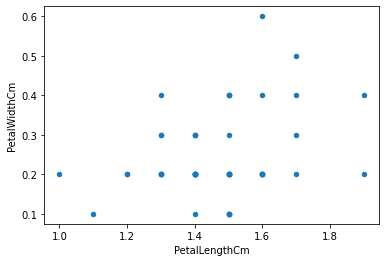

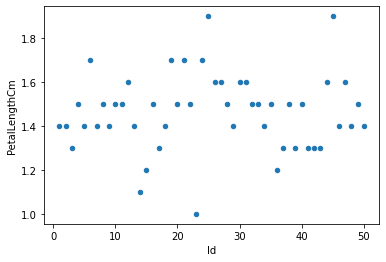

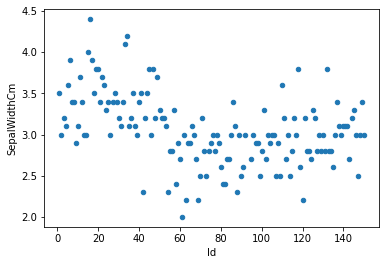

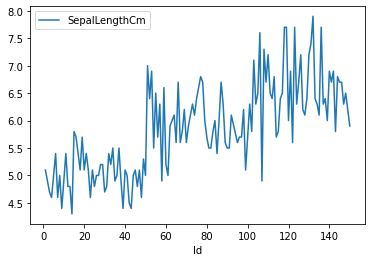

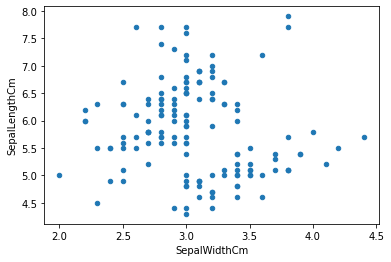

In [16]:
setosa.plot('PetalLengthCm', 'PetalWidthCm', 'scatter')
setosa.plot('Id', 'PetalLengthCm', 'scatter')
data.plot('Id', 'SepalWidthCm', 'scatter')
data.plot('Id', 'SepalLengthCm', 'line')
data.plot('SepalWidthCm', 'SepalLengthCm', 'scatter')

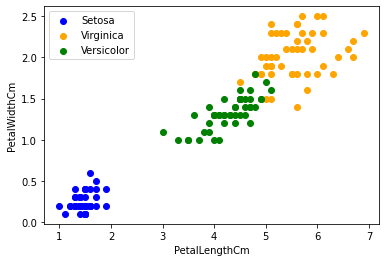

In [17]:
#TESTING VIA PETAL-LENTGTH AND PETAL-WIDTH

plt.scatter(setosa.PetalLengthCm, setosa.PetalWidthCm, label = 'Setosa', color = 'blue' )
plt.scatter(virginica.PetalLengthCm, virginica.PetalWidthCm , label = 'Virginica', color = 'orange')
plt.scatter(versicolor.PetalLengthCm, versicolor.PetalWidthCm, label = 'Versicolor', color = 'green')
# plt.scatter([1], [1], label = 'outlier', color = 'yellow')

plt.legend()
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm') 
plt.show()

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

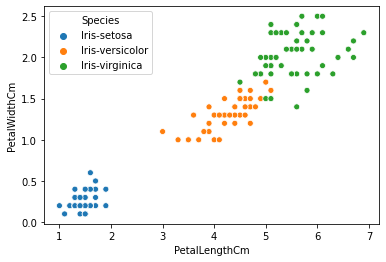

In [21]:
sns.scatterplot(x = "PetalLengthCm", y = "PetalWidthCm", data = data, hue = "Species")

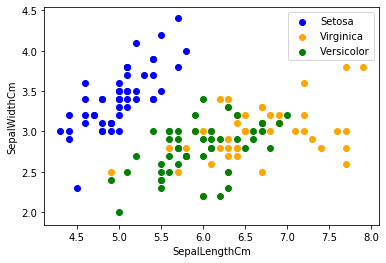

In [7]:
#TESTING VIA SETAL-LENTGTH AND SETAL-WIDTH
plt.scatter(setosa.SepalLengthCm, setosa.SepalWidthCm, label = 'Setosa', color = 'blue' )
plt.scatter(virginica.SepalLengthCm, virginica.SepalWidthCm , label = 'Virginica', color = 'orange')
plt.scatter(versicolor.SepalLengthCm, versicolor.SepalWidthCm, label = 'Versicolor', color = 'green')
plt.legend()
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm') 
plt.show()

In [8]:
def sort_result(data):
    values = data[:,0]
    labels = data[:,1]
    
    sorted_values_perm = values.argsort()
    sorted_values = values[sorted_values_perm]
    sorted_labels = labels[sorted_values_perm]
    
    return np.column_stack((sorted_values, sorted_labels))



In [9]:
def show_result(uniques, result):
    uniques = list(uniques)
    result = list(result)
    
    prediction = ''
    value = 0
    for unique in uniques:
        occurence = result.count(unique)
        if occurence > value:
            prediction = unique
            value = occurence
#         print(unique)
    print(prediction)

In [18]:
def neighbors(data, k = 6, test = [1.9,4.9]):
    distances = []
    for row in data.iterrows():
#         print(row[1][3], row[1][4])
        distance = sqrt((test[0]-row[1][3])**2 + (test[1]-row[1][4])**2)
        distances.append((distance,row[1][5]))
        
    as_numpy_array = np.array(distances)
    sorted_result = sort_result(as_numpy_array)
    uniques = np.array(pd.Series(sorted_result[:,1]).unique())
    
    k_nearest_neighbors = sorted_result[:k,1]
    
    
    show_result(uniques, k_nearest_neighbors)
#     print(uniques)
#     print(sorted_result)
    
neighbors(data, k = 5)

Iris-versicolor
